In [1]:
import matplotlib.pyplot as plt
import lightkurve as lk

import numpy as np

from TESSCroMo.tesscromo import TESSTargetPixelModeler

In [43]:


#
search_result = lk.search_targetpixelfile('TOI 2406', mission='TESS', )
search_result

SearchResult containing 0 data products.

In [114]:
#search = lk.search_tesscut('TOI 2406')
search = lk.search_tesscut('TIC 29832948')
search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,TESScut,1426,TIC 29832948,0.0
1,TESS Sector 02,2018,TESScut,1426,TIC 29832948,0.0
2,TESS Sector 03,2018,TESScut,1426,TIC 29832948,0.0
3,TESS Sector 04,2018,TESScut,1426,TIC 29832948,0.0
4,TESS Sector 05,2018,TESScut,1426,TIC 29832948,0.0
5,TESS Sector 06,2018,TESScut,1426,TIC 29832948,0.0
...,...,...,...,...,...,...
28,TESS Sector 63,2023,TESScut,158,TIC 29832948,0.0
29,TESS Sector 64,2023,TESScut,158,TIC 29832948,0.0


In [115]:
tpf = search[5].download(cutout_size=(20,20))

In [117]:
tpf.interact()

In [121]:
TESSCrowd = TESSTargetPixelModeler(tpf)

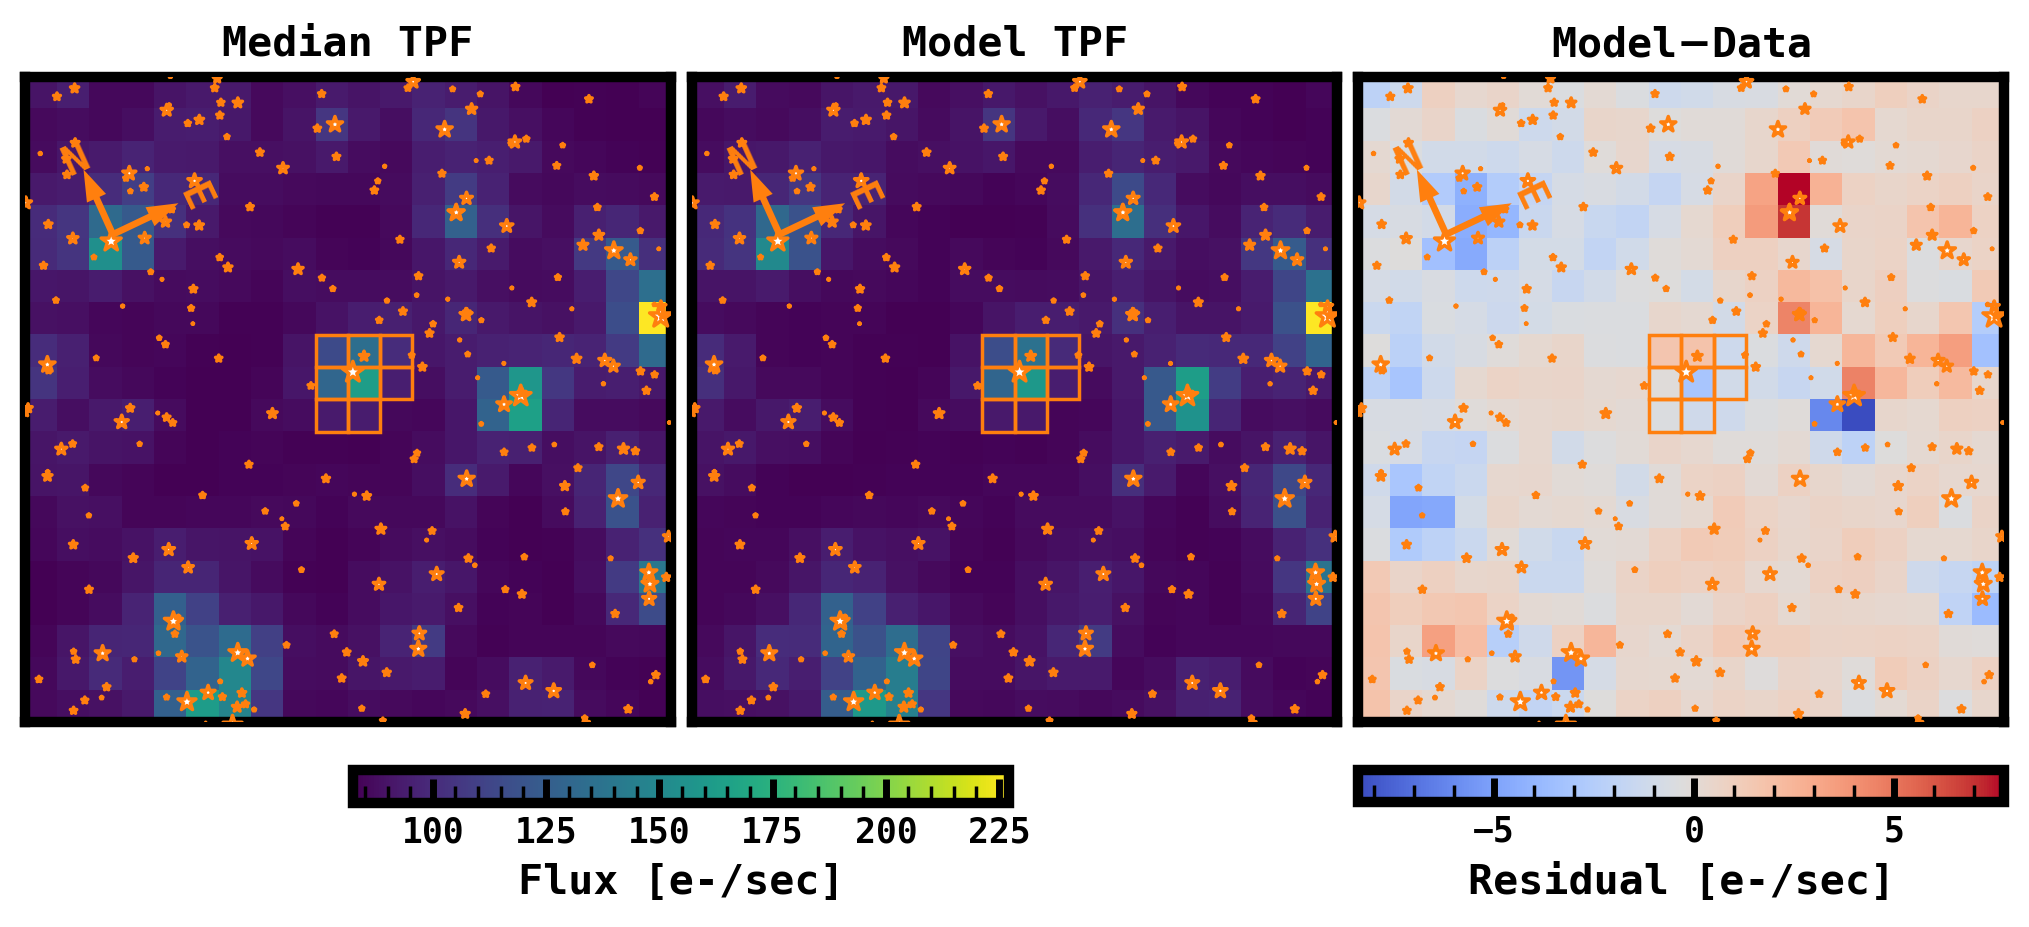

In [163]:
dx, dy = TESSCrowd.estimate_offset()
TESSCrowd.plot_tpf_model(logscale=False, vmax=None);

Text(0.5, 1.0, 'CroMo Background')

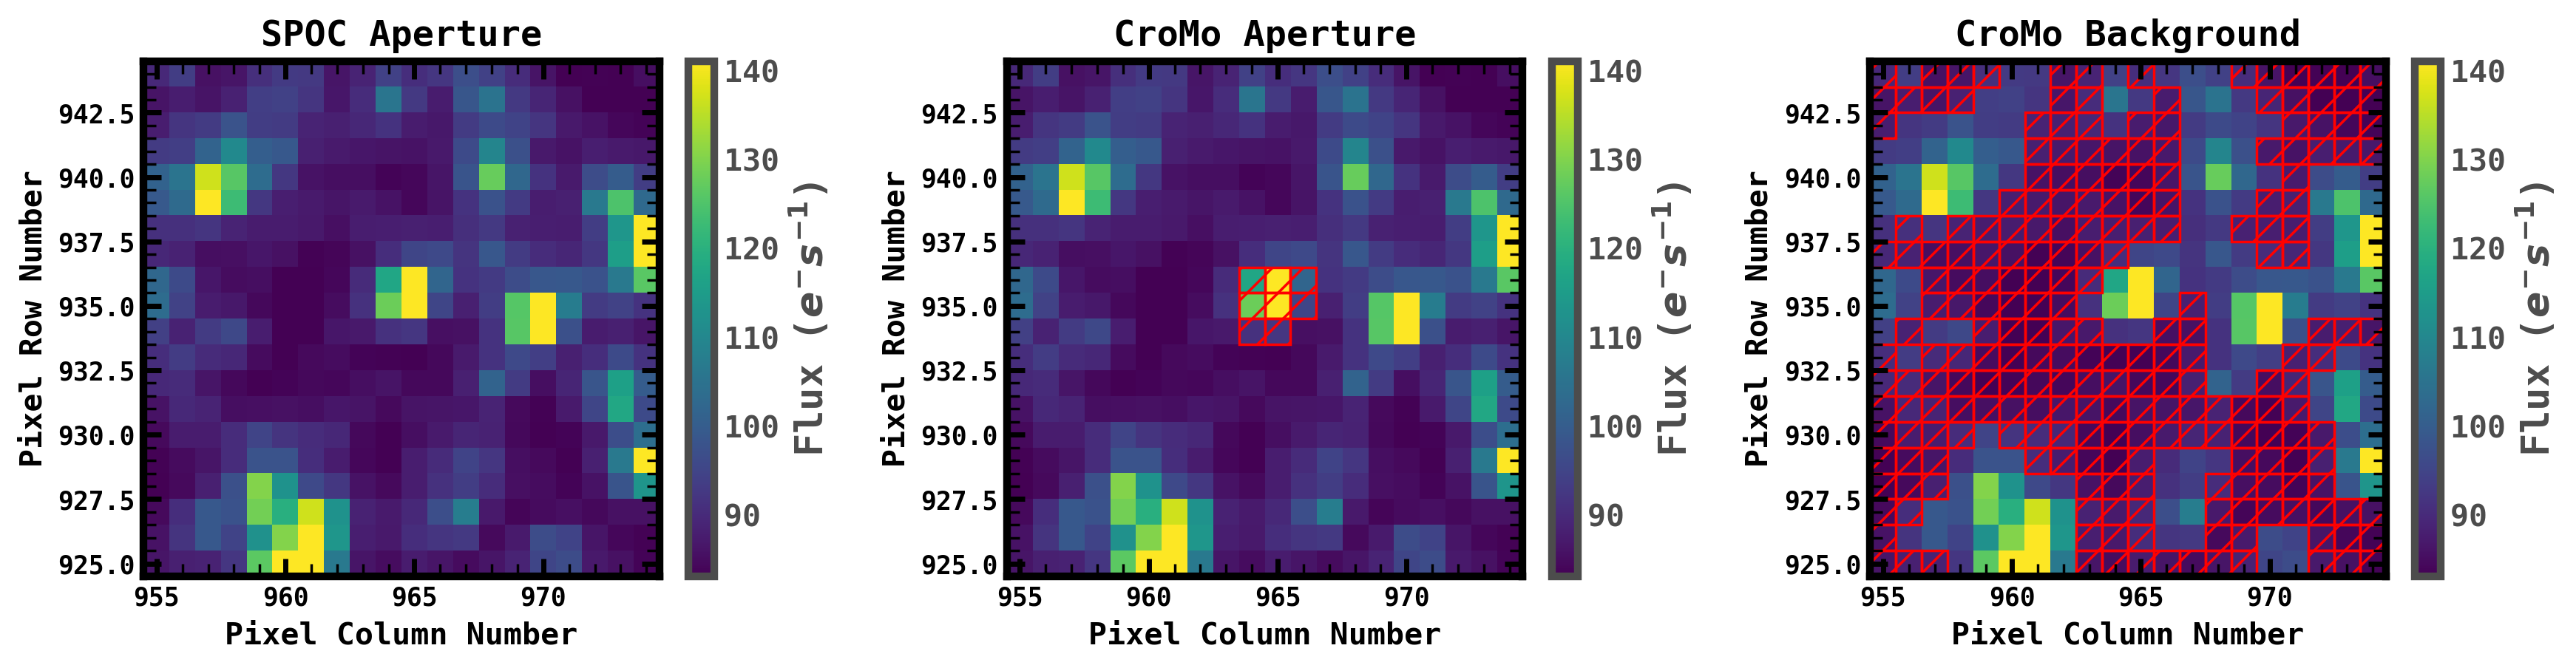

In [164]:
# Calculate the Optimal Aperture for SAP Photometry, Also returns an aperture with background-dominated pixels
# Note: The TPF is already background subtracted, so the background mask is very inaccurate (i.e., non-existant)


cromo_source_aperture, cromo_bkg_aperture = TESSCrowd.get_optimal_aperture(dx=dx, dy=dy, snr_limit=1)

fig, axes = plt.subplots(1, 3, figsize=(14,3.5), constrained_layout=True)
tpf.plot(ax=axes[0], aperture_mask=tpf.pipeline_mask, )
tpf.plot(ax=axes[1], aperture_mask=cromo_source_aperture)
tpf.plot(ax=axes[2], aperture_mask=cromo_bkg_aperture)

axes[0].set_title('SPOC Aperture', fontsize=14)
axes[1].set_title('CroMo Aperture', fontsize=14)
axes[2].set_title('CroMo Background', fontsize=14)



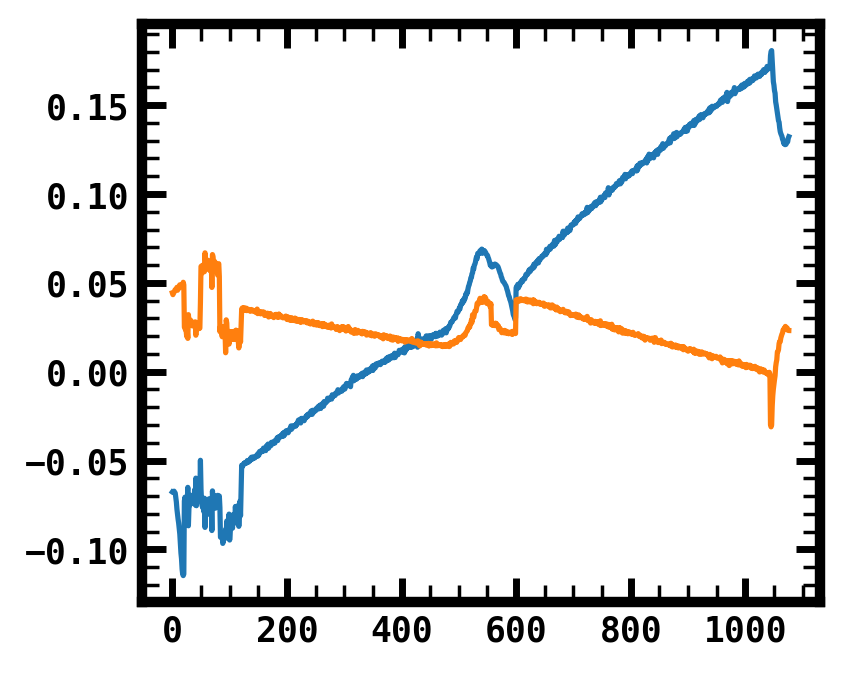

In [165]:
plt.plot(np.array(dxdt).T[0])
plt.plot(np.array(dxdt).T[1])

In [199]:
np.shape(sapflux)

len(sapflux), sum(np.isnan(sapflux))
sapflux = TESSCrowd.get_sap_flux_timeseries(cromo_source_aperture)

/Users/rfwilso1/mypy/TESSCroMo/tesscromo/tesscromo.py:438: RuntimeWarning: invalid value encountered in double_scalars
  contam_frac = np.sum(contam_tpf*best_aperture) / np.sum(allstar_tpf*best_aperture)
/Users/rfwilso1/mypy/TESSCroMo/tesscromo/tesscromo.py:439: RuntimeWarning: invalid value encountered in double_scalars
  flux_frac = np.sum(source_tpf*best_aperture) / np.sum(source_tpf)
/Users/rfwilso1/mypy/TESSCroMo/tesscromo/tesscromo.py:444: RuntimeWarning: divide by zero encountered in true_divide
  data = np.vstack(1./tpf_flux_errs[i].ravel()**2.)*np.vstack(tpf_fluxes[i].ravel())
/Users/rfwilso1/mypy/TESSCroMo/tesscromo/tesscromo.py:444: RuntimeWarning: invalid value encountered in multiply
  data = np.vstack(1./tpf_flux_errs[i].ravel()**2.)*np.vstack(tpf_fluxes[i].ravel())
/Users/rfwilso1/mypy/TESSCroMo/tesscromo/tesscromo.py:445: RuntimeWarning: divide by zero encountered in true_divide
  A = np.vstack(1./tpf_flux_errs[i].reshape(-1)**2.)*np.vstack([allstar_tpf.reshape(-1), bkg

In [200]:
# Get PRF Light Curve
lcfits = TESSCrowd.get_prf_flux_timeseries(progress=True)
psf_flux, zero_point_flux, bkg_flux, dx_t, dy_t = lcfits

# Calculate Crowding Metrics
crowding=TESSCrowd.get_contamination_ratio(aperture=cromo_source_aperture)

crowding

/Users/rfwilso1/mypy/TESSCroMo/tesscromo/tesscromo.py:49: RuntimeWarning: divide by zero encountered in true_divide
  A = np.vstack(1./err.reshape(-1)**2.)*A
/Users/rfwilso1/mypy/TESSCroMo/tesscromo/tesscromo.py:50: RuntimeWarning: divide by zero encountered in true_divide
  data = np.vstack(1./err.reshape(-1)**2.)*data
 42%|█████████████████▏                       | 411/981 [00:17<00:23, 24.28it/s]/Users/rfwilso1/mypy/TESSCroMo/tesscromo/tesscromo.py:470: RuntimeWarning: invalid value encountered in true_divide
  source/=np.sum(source)
100%|█████████████████████████████████████████| 981/981 [00:40<00:00, 24.00it/s]


{'crowdsap': 0.0834798073279035,
 'flfrcsap': 0.7597629373581156,
 'dilution': 1.0910834349263165,
 'med_tpf_bkg_aperture_flux': 647.6036846010359,
 'tess_zeropoint_mag': 20.370994542464963}

In [201]:


# Calculate a SAP Light Curve with PRF data Products
sap_flux = [np.sum(f*cromo_source_aperture)  for f in TESSCrowd.tpf_flux]



# Decrowd the aperture photometry
sap_flux_decrowd = (sap_flux - np.median(sap_flux)*crowding['crowdsap']) / crowding['flfrcsap']

np.shape(sap_flux)


(981,)

In [202]:
len(sap_flux), sum(np.isnan(sap_flux))
len(psf_flux), sum(np.isnan(psf_flux))


(981, 1)

In [203]:
lc_search = lk.search_lightcurve('TOI 2406', mission='TESS',  )
lc_search

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 03,2018,TESS-SPOC,1800,212957629,0.0
1,TESS Sector 03,2018,GSFC-ELEANOR-LITE,1800,212957629,0.0
2,TESS Sector 03,2018,TASOC,1800,212957629,0.0
3,TESS Sector 03,2018,TASOC,1800,212957629,0.0
4,TESS Sector 30,2020,SPOC,120,212957629,0.0
5,TESS Sector 30,2020,TESS-SPOC,600,212957629,0.0
6,TESS Sector 30,2020,QLP,600,212957629,0.0
7,TESS Sector 42,2021,SPOC,120,212957629,0.0
8,TESS Sector 42,2021,TESS-SPOC,600,212957629,0.0


In [204]:
lc_spoc = lc_search[0].download()
lc_elnr=lc_search[1].download()

lc_spoc.columns

<TableColumns names=('time','flux','flux_err','timecorr','cadenceno','centroid_col','centroid_row','sap_flux','sap_flux_err','sap_bkg','sap_bkg_err','pdcsap_flux','pdcsap_flux_err','quality','psf_centr1','psf_centr1_err','psf_centr2','psf_centr2_err','mom_centr1','mom_centr1_err','mom_centr2','mom_centr2_err','pos_corr1','pos_corr2')>

In [205]:
spoc_mask = np.isin(TESSCrowd.cadenceno, lc_spoc['cadenceno'][lc_spoc['quality']==0]) 

len(lc_spoc), len(spoc_mask), len(psf_flux)

#plt.plot(lc_spoc['time'].value, TESSCrowd.time.value[spoc_mask])

len(lc_spoc['time'].value), len(TESSCrowd.time.value)

(880, 981)

1


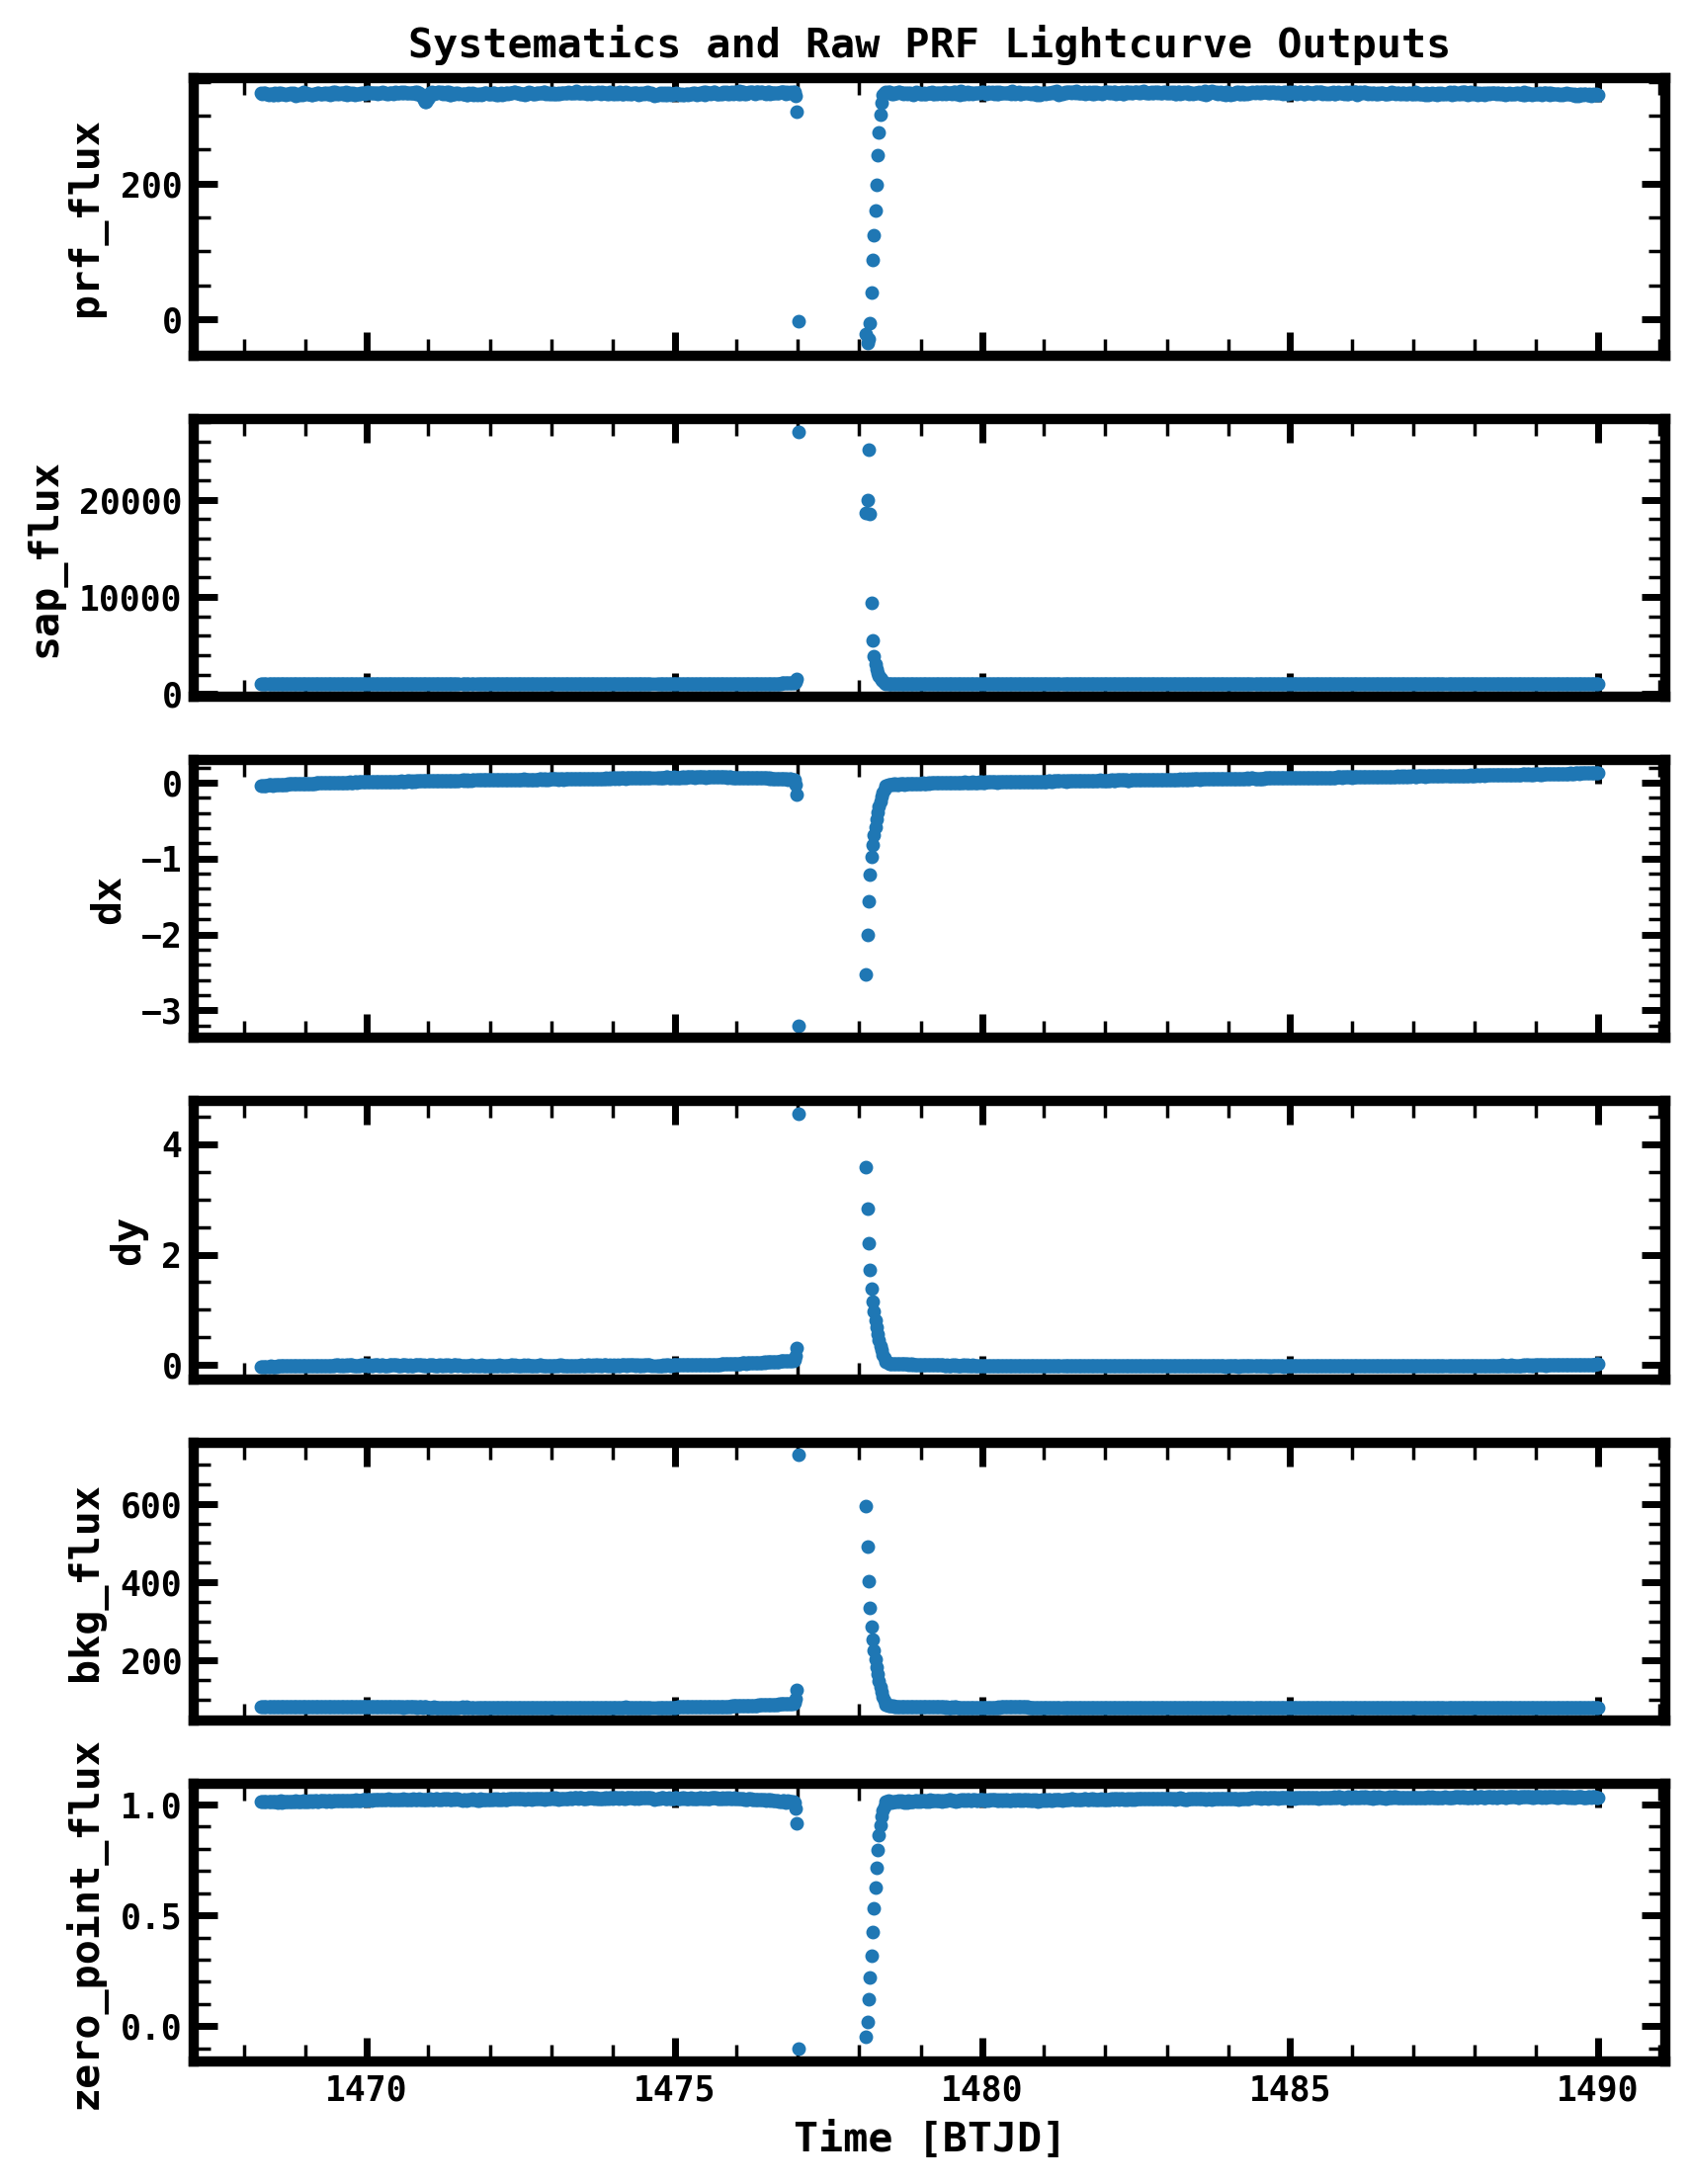

In [210]:
## Plot the Light Curve Products:


print(sum(np.isnan(psf_flux)) )

systematics=[psf_flux[~np.isnan(psf_flux)], np.array(sapflux)[~np.isnan(psf_flux)], dx_t[~np.isnan(psf_flux)],
             dy_t[~np.isnan(psf_flux)], bkg_flux[~np.isnan(psf_flux)], zero_point_flux[~np.isnan(psf_flux)]]
labels=['prf_flux','sap_flux','dx', 'dy', 'bkg_flux', 'zero_point_flux']

fig, axes = plt.subplots(len(systematics), 1, figsize=(7, 1.5*len(systematics)), sharex=True)

for s in range(len(systematics)):

    axes[s].plot(TESSCrowd.time.value[:-1], systematics[s], '.')
    axes[s].set_ylabel(labels[s])


axes[-1].set_xlabel('Time [BTJD]')
axes[0].set_title('Systematics and Raw PRF Lightcurve Outputs')

plt.tight_layout()

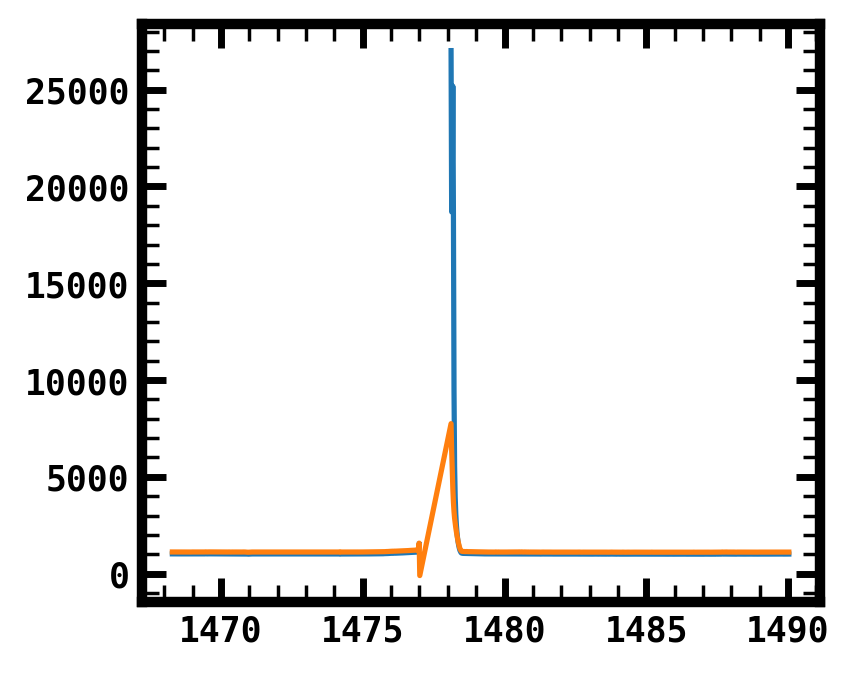

In [211]:

#plot(TESSCrowd.time.value, systematics[s], lw=1)

plt.plot(TESSCrowd.time.value, sapflux)
plt.plot(TESSCrowd.time.value, sap_flux_decrowd)

CroMo PRF LC scatter:    0.0031498124969735475
CroMo SAP LC scatter:    0.001091063
SPOC SAP LC scatter:     0.005428910255432129
Eleanor SAP LC scatter:  0.004972994327545166


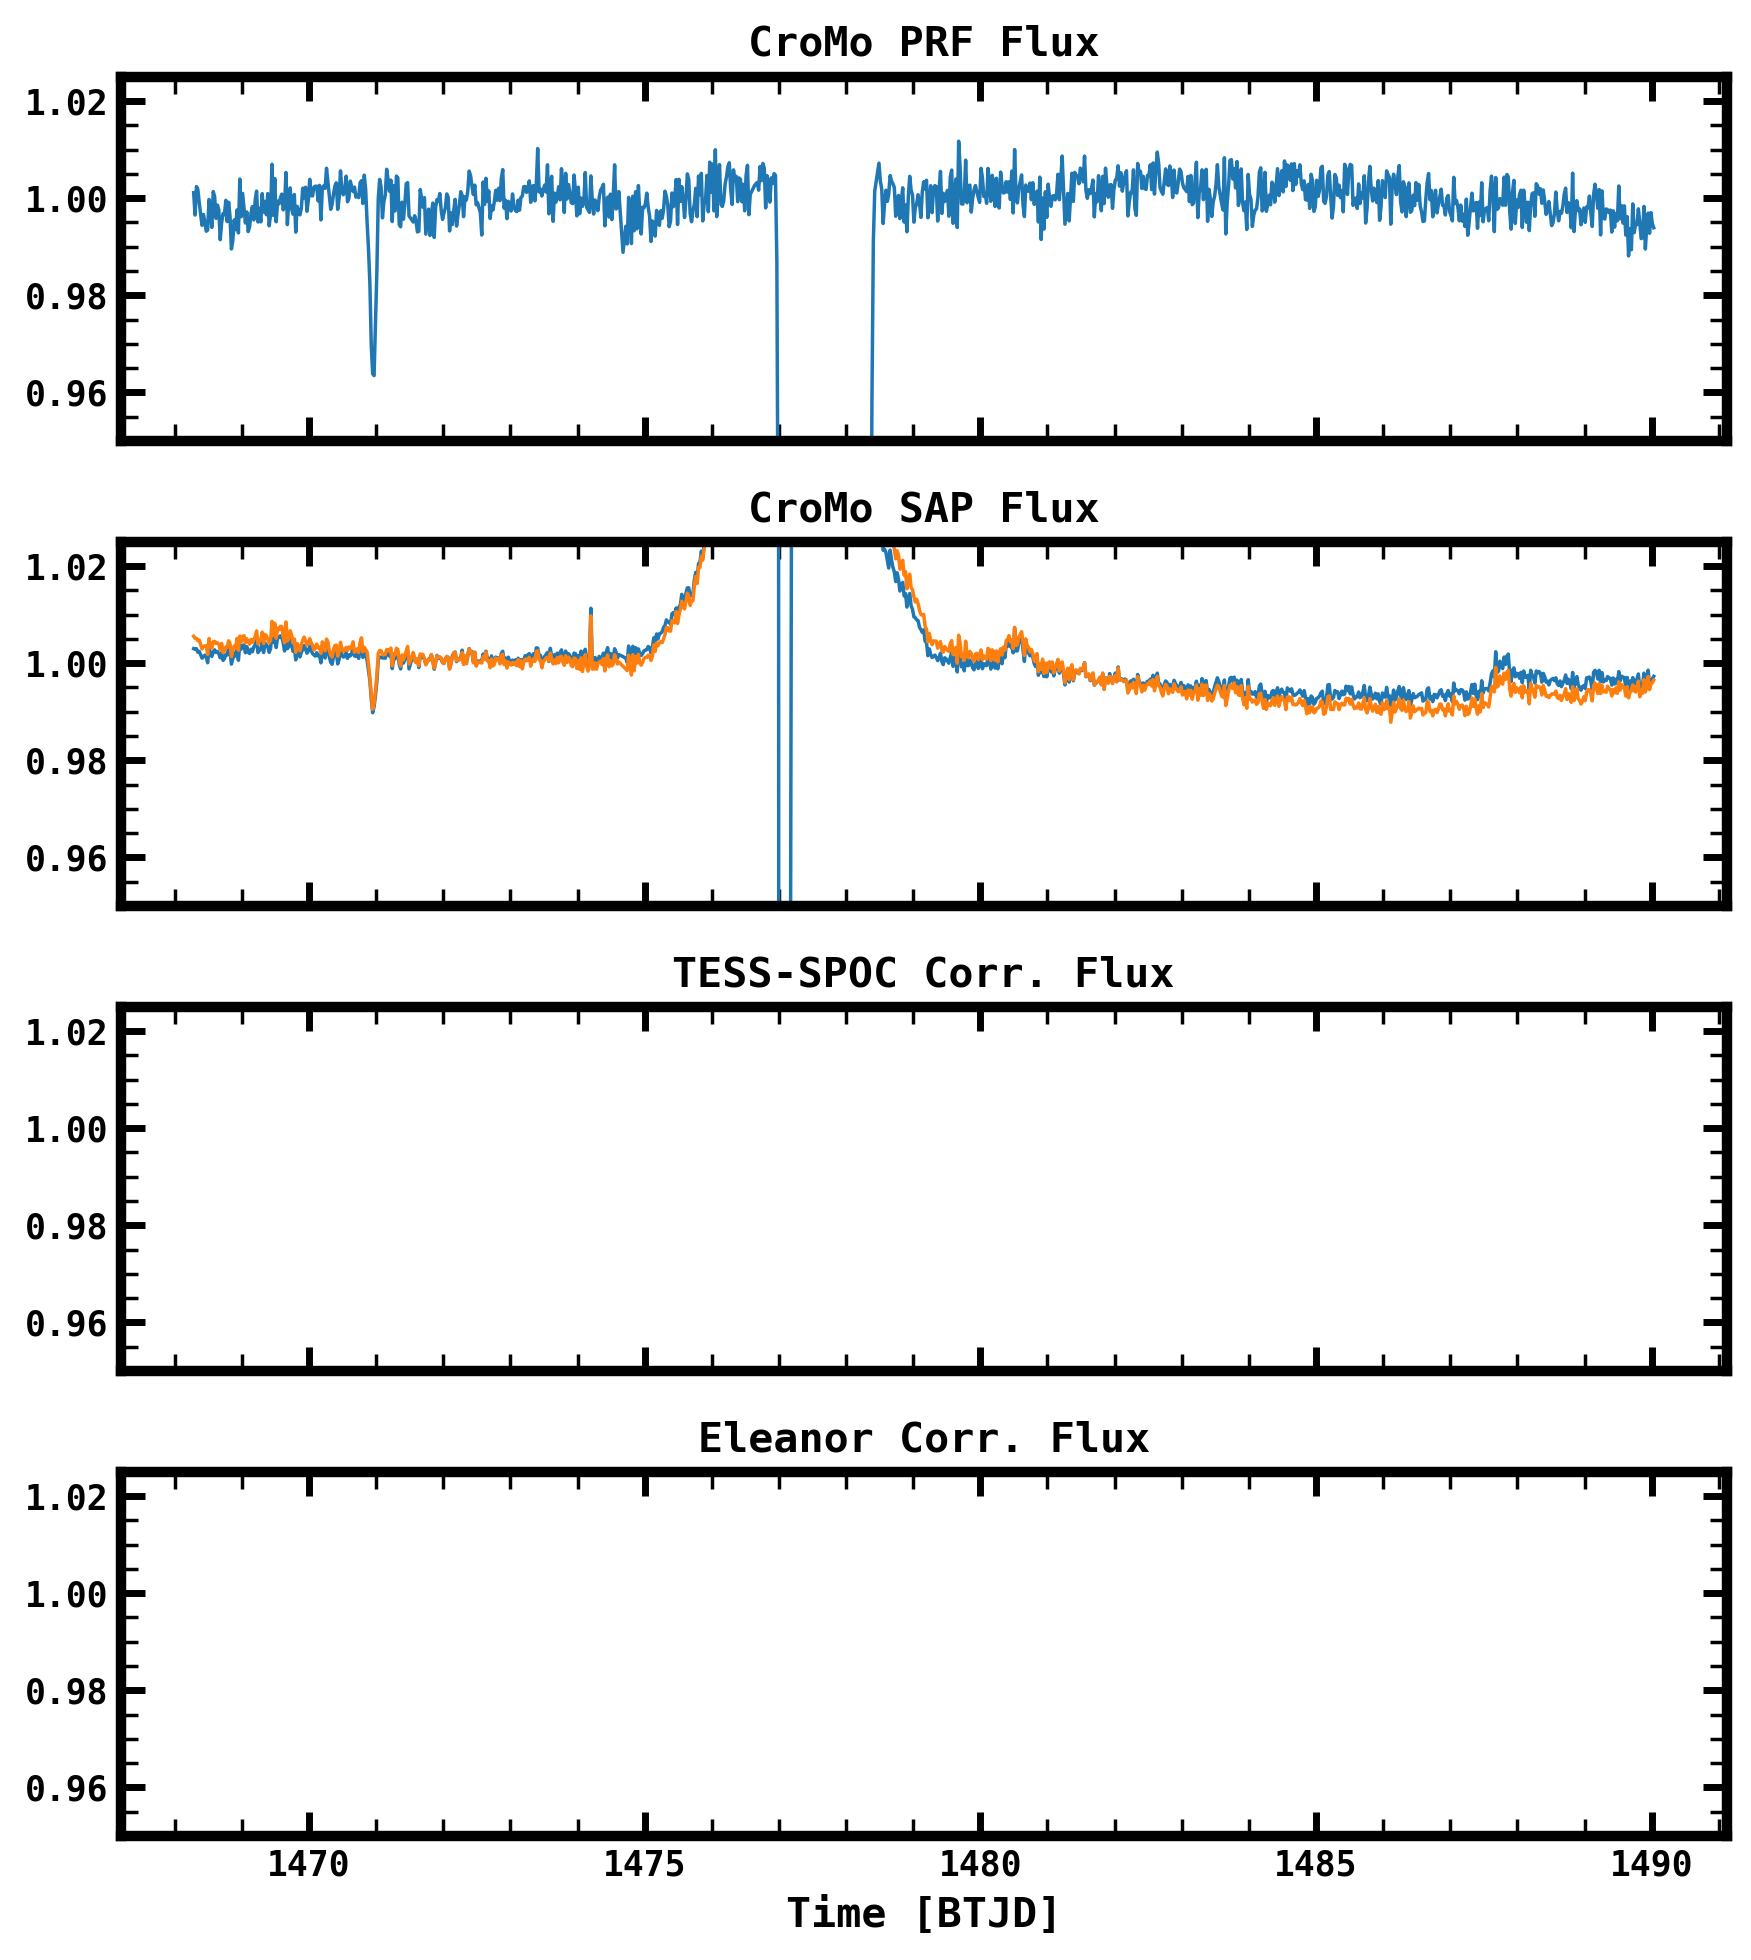

In [212]:
# Compare to Other Light Curves

def norm(x):
    return x/np.nanmedian(x)

def point_scatter(x):
    return np.median(np.abs(np.diff(norm(x))) )


#print(spoc_mask['flux'].value)


fig, axes = plt.subplots(4,1, figsize=(7,8), sharey=True, sharex=True)

P=3.0766e10

axes[0].plot(TESSCrowd.time.value%P, norm(psf_flux), '-', lw=1)
axes[1].plot(TESSCrowd.time.value%P, norm(sap_flux_decrowd), '-', lw=1)
axes[1].plot(TESSCrowd.time.value%P, norm(sapflux), '-', lw=1)
#axes[2].plot(lc_spoc.time.value%P, norm(lc_spoc.flux), '-', lw=1)
#axes[3].plot(lc_elnr.time.value[spoc_mask], lc_elnr.flux[spoc_mask]/np.nanmedian(lc_elnr.flux), '-', lw=1)


axes[0].set_title('CroMo PRF Flux')
axes[1].set_title('CroMo SAP Flux')
axes[2].set_title('TESS-SPOC Corr. Flux')
axes[3].set_title('Eleanor Corr. Flux')


axes[-1].set_xlabel('Time [BTJD]')

#plt.xlim(2491,2494)

plt.tight_layout()


plt.ylim(0.95, 1.025)
# Print Point to Point Scatter
print('CroMo PRF LC scatter:   ', point_scatter(psf_flux[~np.isnan(psf_flux)]) )
print('CroMo SAP LC scatter:   ', point_scatter(sap_flux_decrowd) )
print('SPOC SAP LC scatter:    ', point_scatter(lc_spoc.flux) )
print('Eleanor SAP LC scatter: ', point_scatter(lc_elnr.flux) )

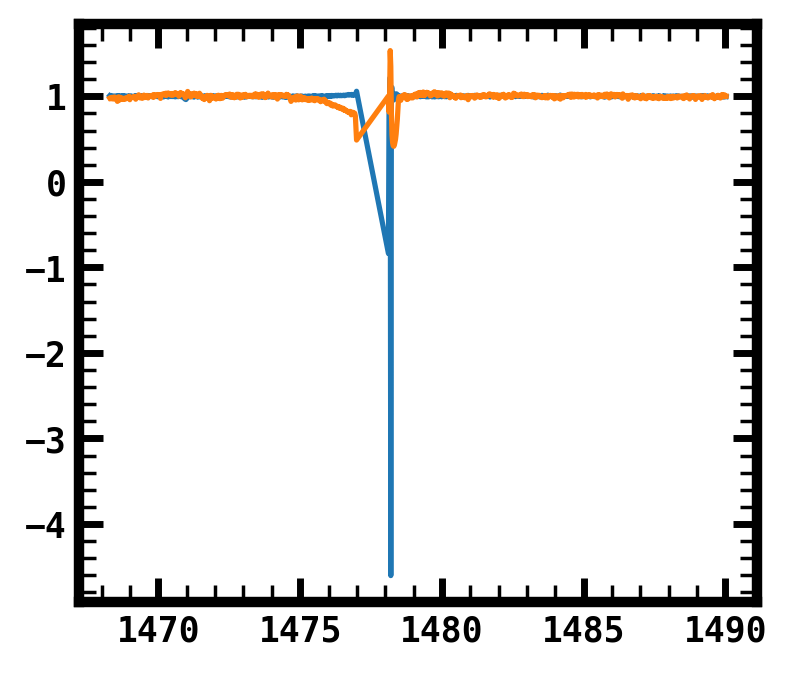

In [215]:
## Correct Systematics with dx, dxy, and bkg/zeropoint flux
from lightkurve.correctors import RegressionCorrector, DesignMatrix


#regressors = np.hstack(np.array([dx_t, dy_t, bkg_flux, zero_point_flux], ))


def light_curve_corrector(systematics, ):

    prf_flux, sap_flux = systematics[0], systematics[1]

    dm = DesignMatrix(np.vstack(systematics[2:]).T)
    dm = dm.pca(4).append_constant()

    X = dm.X

    flux_err = 5e-4*np.ones_like(prf_flux)

    Xw = X.T.dot(X / flux_err[:, None] ** 2)
    
    B_prf = np.dot(X.T, prf_flux/flux_err )
    B_sap = np.dot(X.T, sap_flux/flux_err )

    w_prf = np.linalg.solve(Xw, B_prf).T
    w_sap = np.linalg.solve(Xw, B_sap).T
    
    prf_flux_corr = prf_flux/X.dot(w_prf)
    sap_flux_corr = sap_flux/X.dot(w_sap)

    return prf_flux_corr, sap_flux_corr 

#X=dm.X

#flux_err = 5e-4*np.ones_like(psf_flux)
#sigma_w_inv = X.T.dot(X / flux_err[:, None] ** 2)
#B = np.dot(X.T, psf_flux / flux_err ** 2)

#w = np.linalg.solve(sigma_w_inv, B).T

#model_flux = X.dot(w)


#print(sum(np.isnan(systematics)) )

corr_prf, corr_sap = light_curve_corrector( systematics )


#plt.plot(lc_spoc.time.value[~np.isnan(psf_flux)], norm(lc_spoc.flux), '-', lw=1)

plt.plot(TESSCrowd.time.value[~np.isnan(psf_flux)], norm(corr_prf) , '-' )

#plt.plot(TESSCrowd.time.value[spoc_mask], norm(corr_sap[spoc_mask]) - 0.06 )
plt.plot(TESSCrowd.time.value[~np.isnan(psf_flux)], norm(corr_sap) )



ValueError: x and y must be the same size

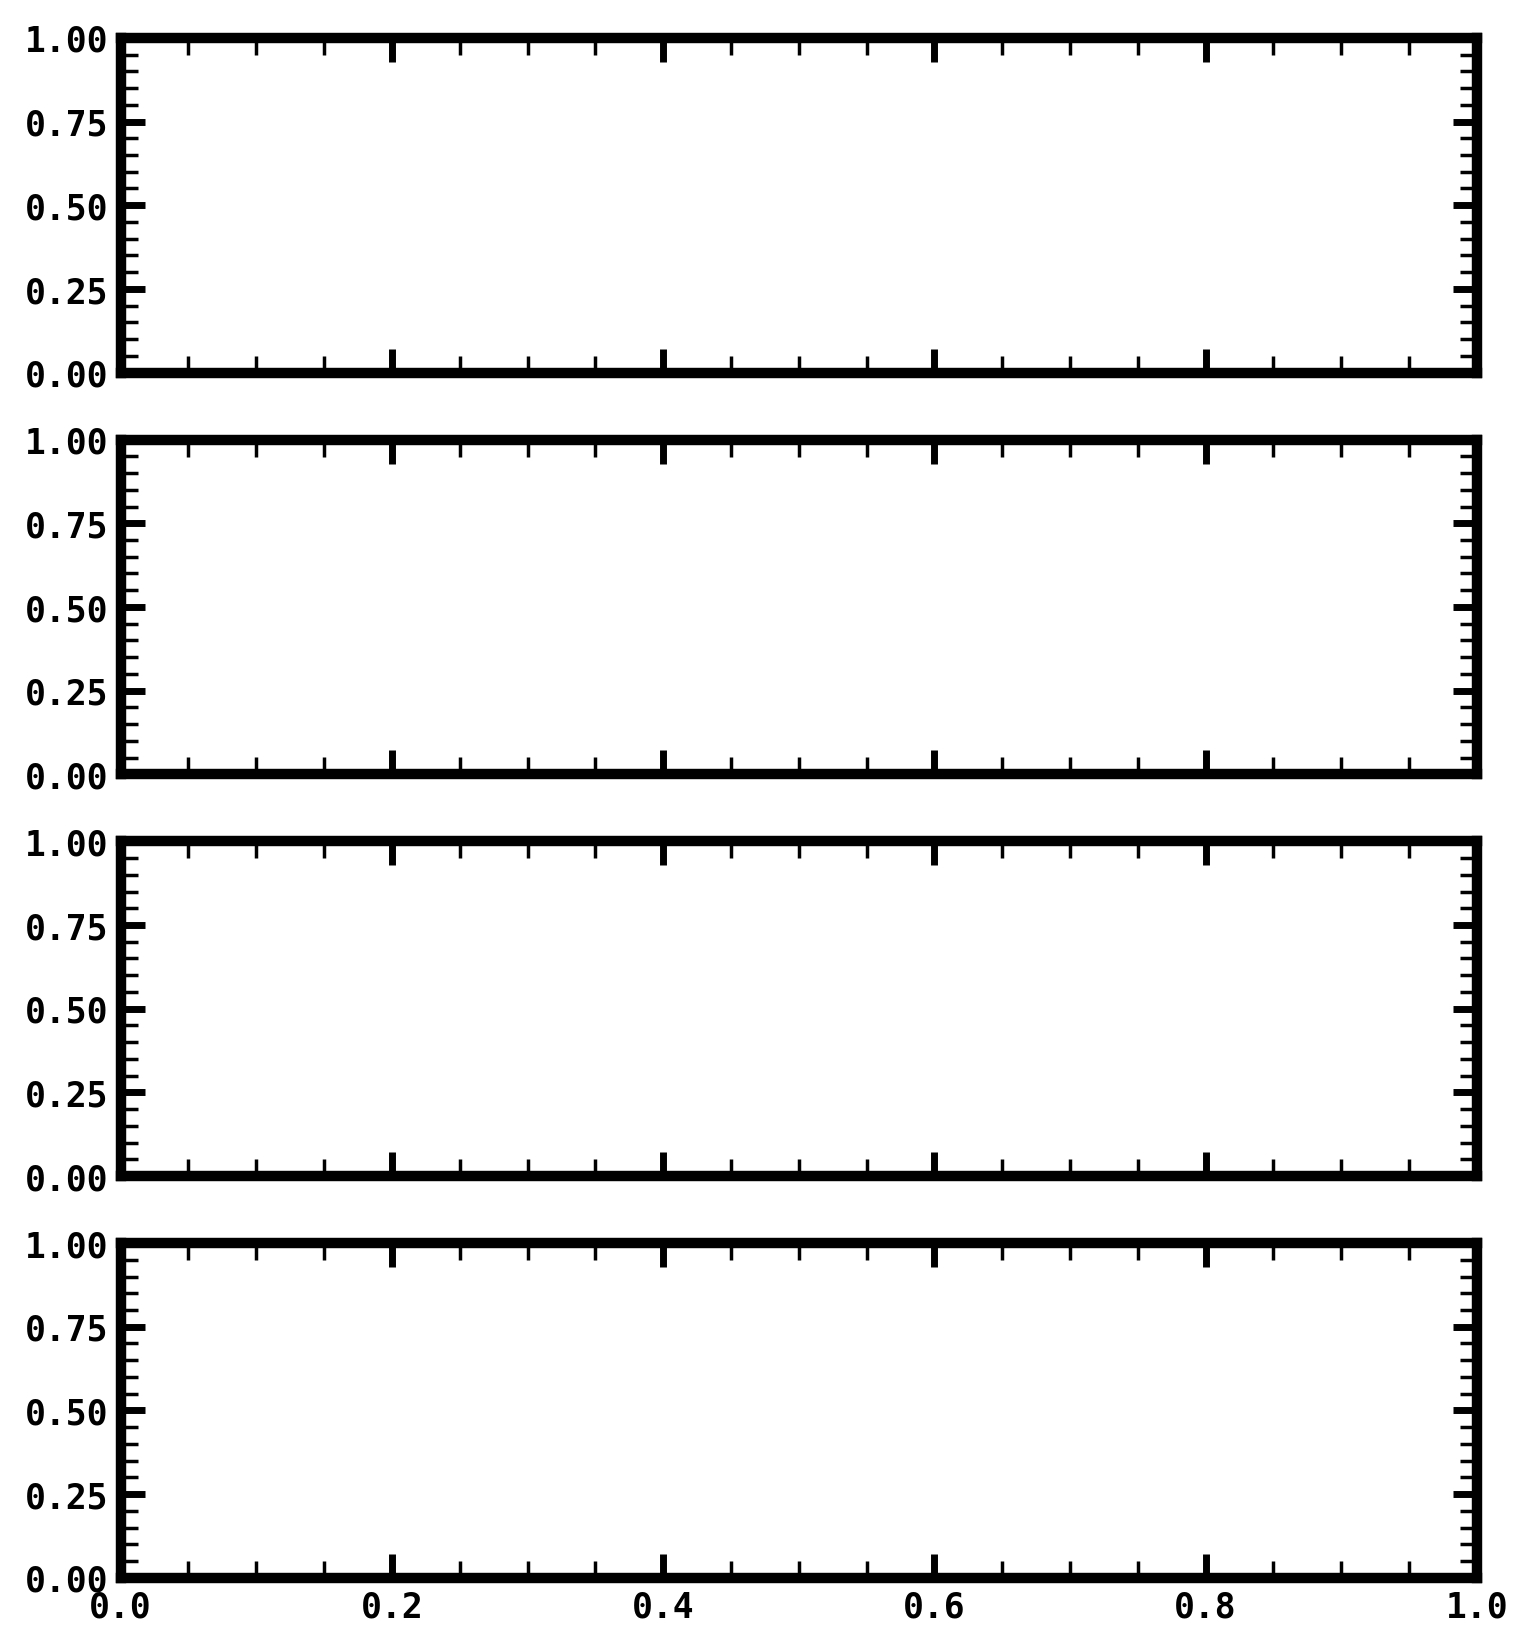

In [214]:
fig, axes = plt.subplots(4,1, figsize=(7,8), sharey=True, sharex=True)

P=3.0766896
t0 = 2459475.946047 - 2457000

axes[0].scatter(TESSCrowd.time.value%P - t0%P, norm(corr_prf), marker='.', c=TESSCrowd.time.value, cmap='rainbow') 
axes[1].plot(TESSCrowd.time.value%P- t0%P, norm(corr_sap), '.', lw=1) 
axes[2].plot(lc_spoc.time.value%P- t0%P, norm(lc_spoc.flux), '.', lw=1) 
#axes[3].plot(lc_elnr.time.value%P, lc_elnr.flux/np.nanmedian(lc_elnr.flux), '.', lw=1)

axes[0].set_title('CroMo PRF Flux') 
axes[1].set_title('CroMo SAP Flux') 
axes[2].set_title('TESS-SPOC Corr. Flux') 
axes[3].set_title('Eleanor Corr. Flux')

axes[-1].set_xlabel('Time [BTJD]')


axes[0].set_xlim(-0.7, 0.7)


plt.tight_layout()

print('CroMo PRF LC scatter: ', point_scatter(corr_prf),)
print('CroMo SAP LC scatter: ', point_scatter(corr_sap) ) 
print('SPOC SAP LC scatter: ', point_scatter(lc_spoc.flux) ) 
print('Eleanor SAP LC scatter: ', point_scatter(lc_elnr.flux) )